This notebook is in line with the tutorial in https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import pandas as pd

In [9]:
DatasetBaseFolder = '/content/gdrive/MyDrive/ColabNotebooks/IMDB-Movie-Data.csv'

In [10]:
data = {
    'apples' : [0, 2, 1, 3],
    'oranges' : [1, 5, 2, 4]
}

purchases = pd.DataFrame(data);
purchases

,apples,oranges
0,0,1
1,2,5
2,1,2
3,3,4


In [12]:
movies_df = pd.read_csv(DatasetBaseFolder, index_col="Title")


In [38]:
#Lets see first 5 rows
movies_df.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [13]:
#Lets see last 5 rows
movies_df.tail(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [14]:
movies_df.shape

(1000, 11)

In [15]:
#To get an overview of the dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [16]:
#If you want to remove duplicate instances
movies_df = movies_df.drop_duplicates(keep = 'first') #Drop all instances keep = false inplace=True



In [17]:
#If you wish to rename columns
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
movies_df.rename(columns = {'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_millions'}, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [19]:
#To count number of null entries in each colum
movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

In [20]:
movies_dfTmp = movies_df.dropna(axis=0) #To drop instances with null values
movies_dfTmp.shape
#movies_df.shape

(838, 11)

In [21]:
movies_dfTmp = movies_df.dropna(axis=1) #To drop columns containing null values
movies_dfTmp.shape

(1000, 9)

In [22]:
movies_df.shape

(1000, 11)

In [23]:
#Imputing with Mean
revenue = movies_df['Revenue_millions']
revenue.head(5)

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenue_millions, dtype: float64

In [24]:
meanRev = revenue.mean(0)
revenue.fillna(meanRev, inplace=True)
movies_df.isnull().sum() #Note that this get updated

Rank                 0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
Revenue_millions     0
Metascore           64
dtype: int64

In [25]:
#Describ the Dataset
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [26]:
#if you want to count
movies_df['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Comedy,Music,Romance        1
Comedy,Sci-Fi               1
Crime,Drama,Fantasy         1
Action,Fantasy,War          1
Adventure,Drama,Horror      1
Name: Genre, Length: 207, dtype: int64

In [27]:
#Correlation
movies_df.corr()  #Note the attributes in  S

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [28]:
#slicing along columns
subset = movies_df[['Genre', 'Rating']]
type(subset)

pandas.core.frame.DataFrame

In [29]:
#Slicing along rows
movies_df.loc['Prometheus'] #using key index
movies_df.iloc[1] #using numerical index

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue_millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [30]:
#few instances 1 through 3
movie_subset = movies_df.iloc[1:4]
movie_subset

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [31]:
#conditional selection
#Pick movies with rating more than 8.5
rating = movies_df['Rating']
rating[rating.gt(8.5)]

Title
Interstellar        8.6
The Dark Knight     9.0
Inception           8.8
Kimi no na wa       8.6
Dangal              8.8
The Intouchables    8.6
Name: Rating, dtype: float64

In [32]:
#Pick movies based on Director
moviesByRidley = movies_df[(movies_df['Director'] == "Ridley Scott") & movies_df['Rating'].gt(7.5)]
moviesByRidley.head(4)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
The Martian,103,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0
American Gangster,471,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0


In [33]:
#all movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.
movies_df[
    ((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
    & (movies_df['Revenue_millions'] < movies_df['Revenue_millions'].quantile(0.25))
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [34]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

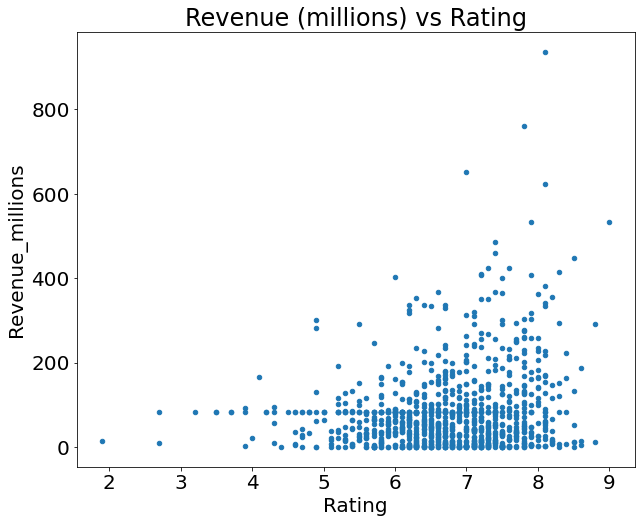

In [35]:
#For categorical variables utilize Bar Charts* and Boxplots.
#For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.
movies_df.plot(kind='scatter', x='Rating', y='Revenue_millions', title='Revenue (millions) vs Rating');

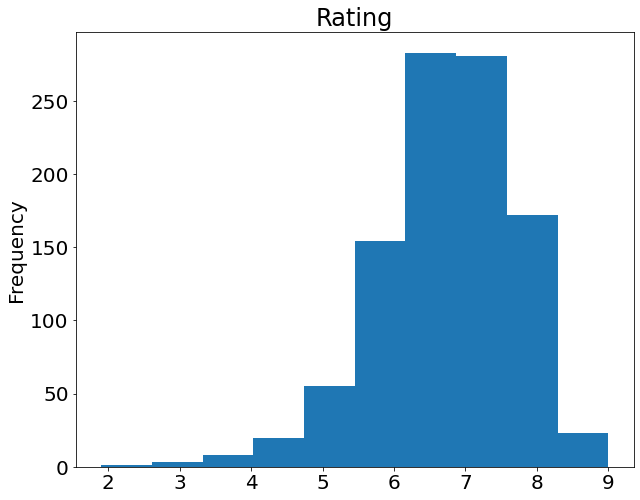

In [36]:
movies_df['Rating'].plot(kind='hist', title='Rating');

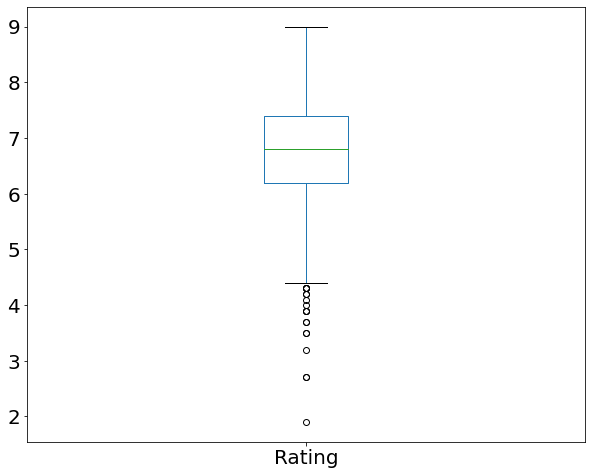

In [37]:
movies_df['Rating'].plot(kind="box");